# Final Project: Scottish Haggis Data Analysis

## Introduction
This project aims to demonstrate the data mining lifecycle by applying clustering, classification, and regression techniques to the Scottish Haggis dataset. The dataset contains sightings of three species of Haggis across different Scottish islands.

## Stage 1: Exploratory Data Analysis (EDA)
In this stage, we will load the data, inspect its structure, visualize distributions and relationships, and perform necessary data cleaning.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
file_path = 'scottish_haggis_2025.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [2]:
# Inspect data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [3]:
# Summary statistics
df.describe(include='all')

,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,334,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Macduff,Skye,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,140,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.939883,17.159006,200.901374,4205.796287,NaN,2024.029070
std,99.448479,NaN,NaN,5.477357,1.995574,14.121750,802.563431,NaN,0.818356
min,1.000000,NaN,NaN,32.080000,13.120000,171.000000,2616.550000,NaN,2023.000000
25%,86.750000,NaN,NaN,39.355000,15.462500,189.420000,3572.057500,NaN,2023.000000
50%,172.500000,NaN,NaN,44.540000,17.385000,196.730000,4045.035000,NaN,2024.000000
75%,258.250000,NaN,NaN,48.360000,18.700000,212.900000,4798.850000,NaN,2025.000000


### Initial Inspection Commentary
*Observation of the data structure, types, and summary statistics will be added here after execution.*

## Visualizations
We will now visualize the data to understand distributions and relationships.

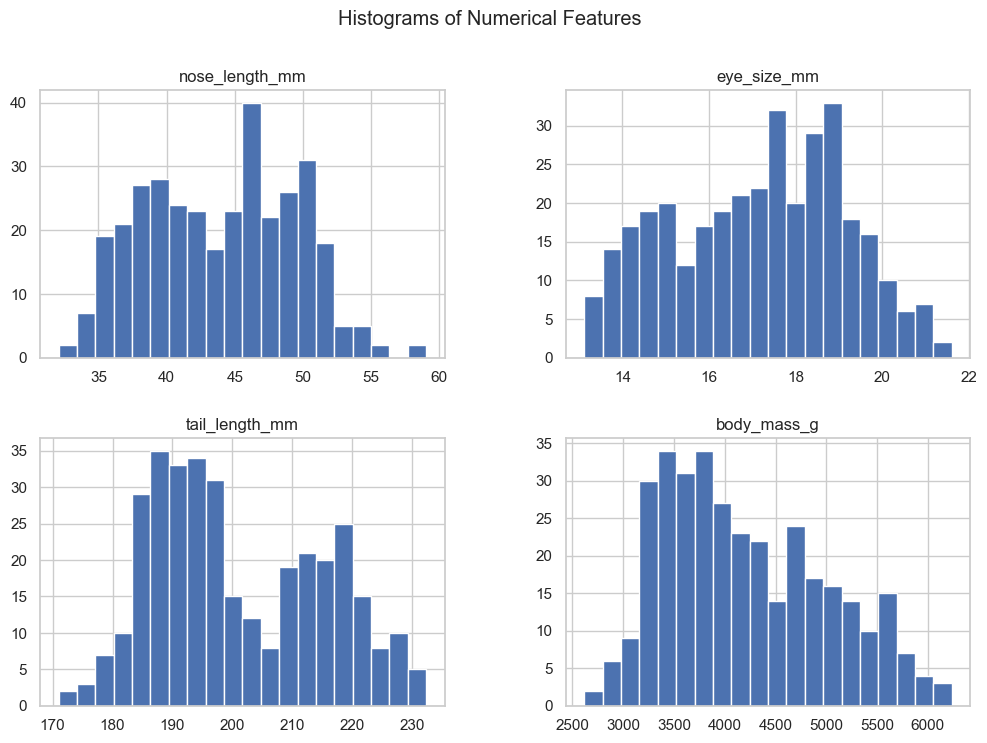

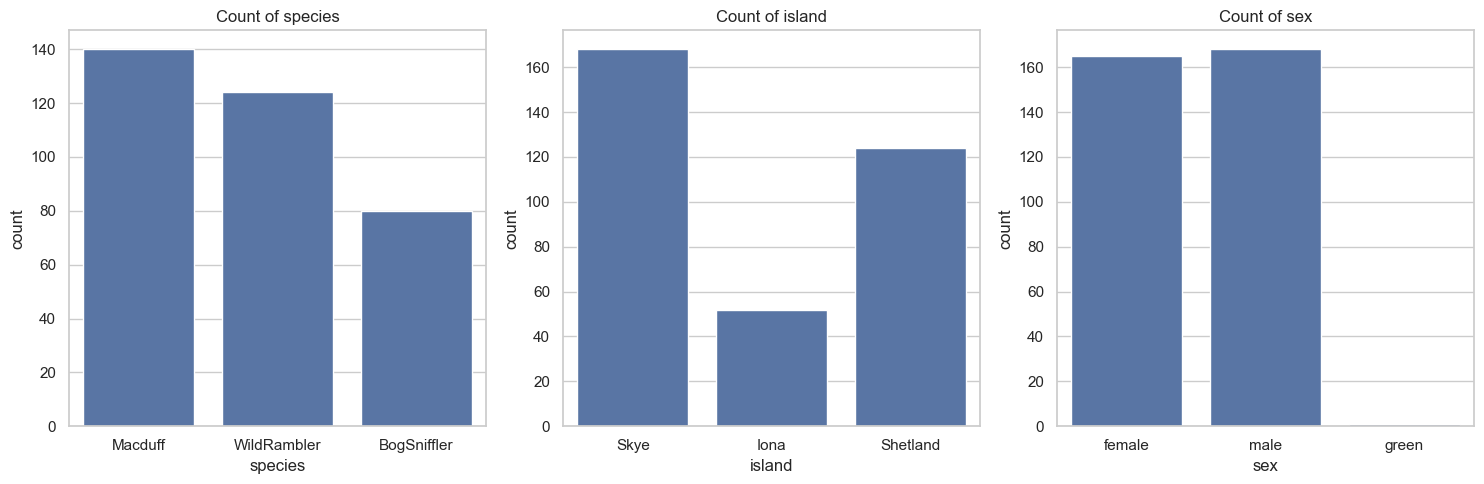

In [4]:
# Histograms for numerical features
numerical_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Count plots for categorical features
categorical_cols = ['species', 'island', 'sex']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

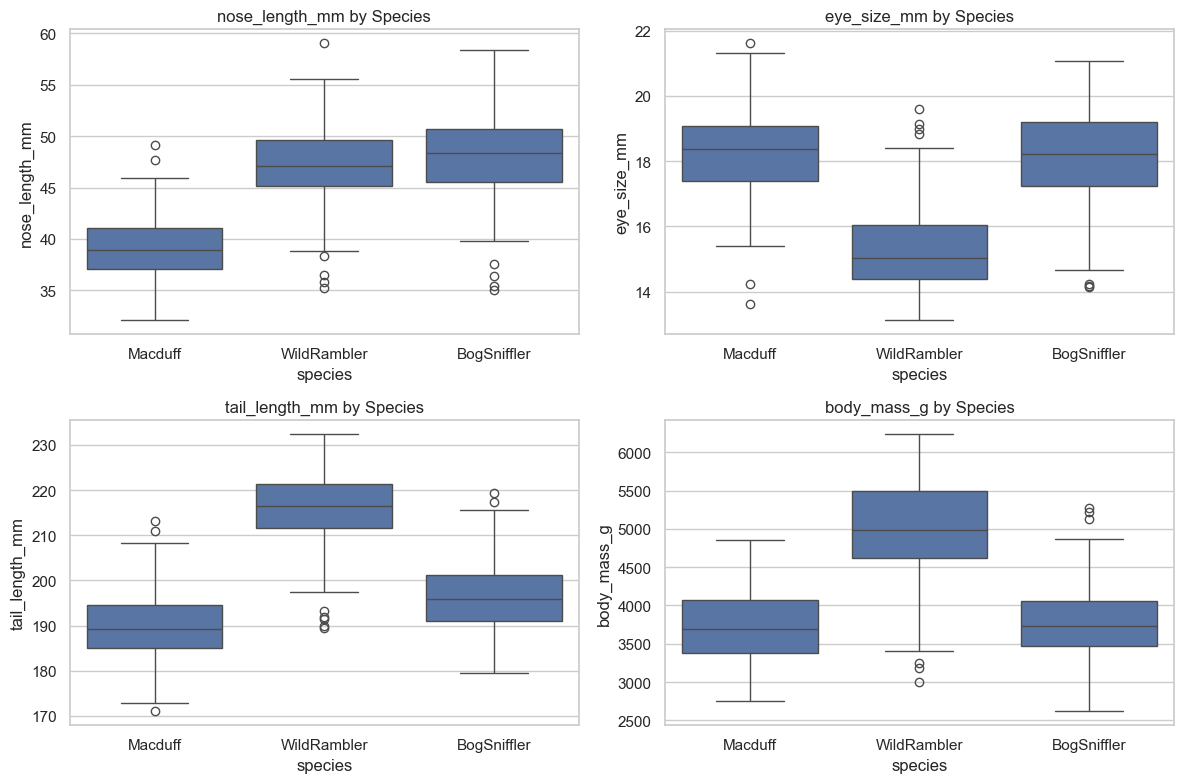

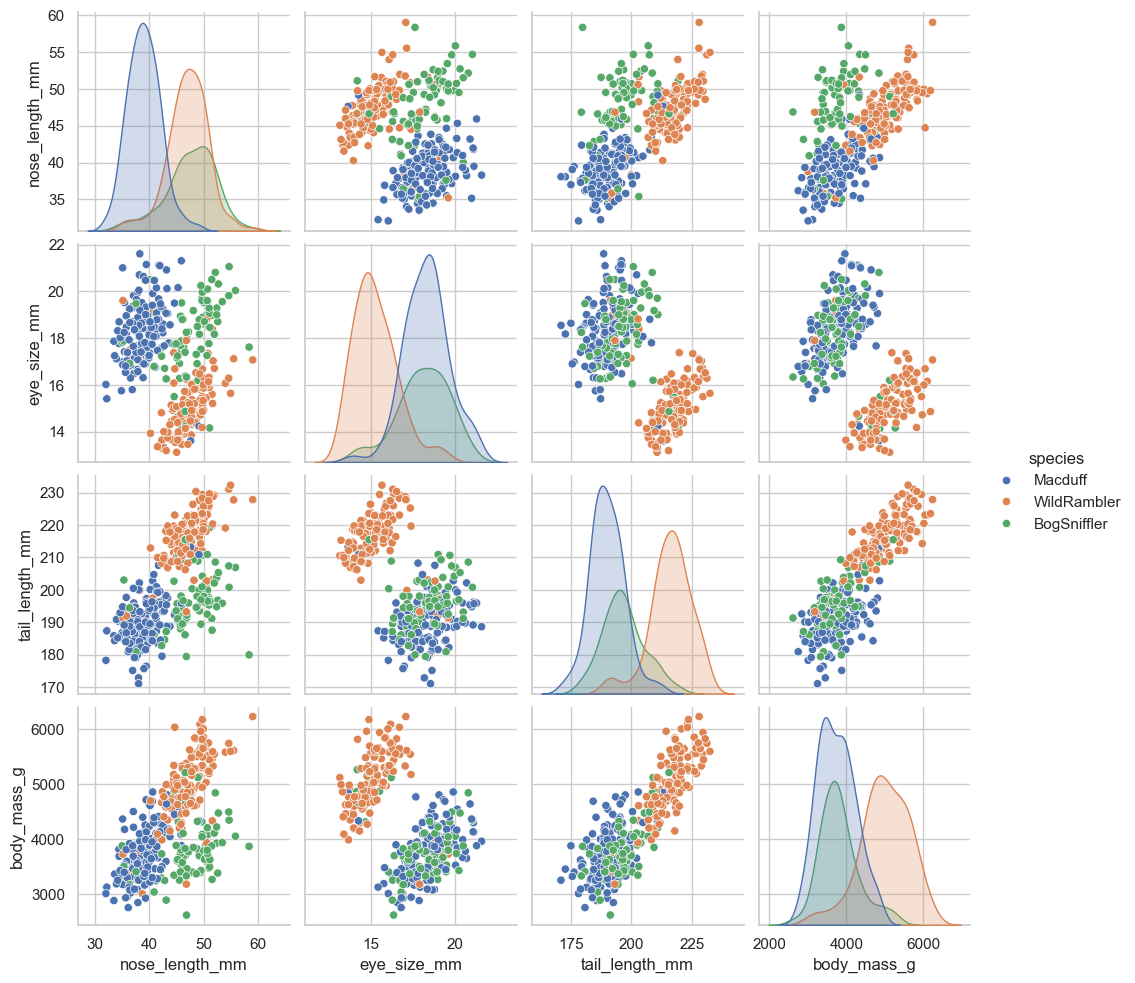

In [5]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col, x='species')
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()

# Pairplot to see relationships
sns.pairplot(df, hue='species', vars=numerical_cols)
plt.show()

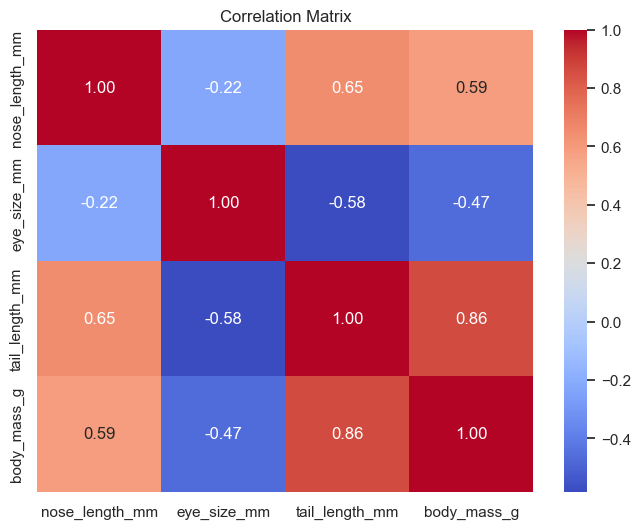

In [6]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning
We will check for missing values and duplicates.

### Missing Values


In [7]:
# Check for missing values
print(df.isnull().sum())

id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64


In [8]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [9]:
# Handling Missing Values and Duplicates
# If missing values are few, we might drop them. If many, we might impute.
# For this initial stage, we will drop duplicates if any exist.
df.drop_duplicates(inplace=True)

# Handling Missing Values (Example strategy: drop rows with missing values)
# df.dropna(inplace=True) 
# Note: Uncomment the line above if missing values are found and dropping is the chosen strategy.

## Feature Engineering [OPTIONAL]
We can consider creating new features that might be useful for analysis.
*   **Example:** We could create a ratio of `body_mass_g` to `tail_length_mm` to see if it helps distinguish species.
*   **Example:** We could bin `year` if we wanted to treat it as a categorical era, though it is likely better as a continuous variable or ignored if not relevant to biological features.

For now, we will proceed with the original features but keep this in mind if model performance needs improvement.

In [10]:
# Example Feature Engineering (Commented out until needed)
# df['mass_to_tail_ratio'] = df['body_mass_g'] / df['tail_length_mm']
# df.head()

## Scaling/Normalisation and Encoding
We will discuss the need for scaling and encoding.
*   **Encoding:** Categorical variables like `species`, `island`, and `sex` will need to be encoded for machine learning models. We can use One-Hot Encoding or Label Encoding.
*   **Scaling:** Numerical features like `nose_length_mm`, `eye_size_mm`, `tail_length_mm`, and `body_mass_g` have different ranges. Algorithms like K-Means and KNN are sensitive to scale, so standardization (Z-score normalization) or Min-Max scaling will be necessary.

This will be applied in the respective stages (Clustering, Classification).

## Stage 2: Unsupervised Learning (Clustering)
In this stage, we will apply K-Means clustering to the data.

### Data Preparation
We will use the numerical features for clustering and scale them using StandardScaler, as K-Means is sensitive to the scale of the data.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features_for_clustering = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
X = df[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe for convenience (optional, but helpful for debugging)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
X_scaled_df.head()

,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
0,-1.731448,0.306623,-0.756777,-0.489458
1,-0.597857,1.380568,0.134644,0.817435
2,-0.921479,-0.426068,-1.174475,-1.127175
3,-1.241444,1.335402,-0.704298,0.014380
4,-1.111630,0.818503,-0.560338,-1.401512


### Determine 'k' (Elbow Method)
We will use the Elbow Method to determine the optimal number of clusters (k). We will plot the inertia (sum of squared distances to the nearest cluster center) for different values of k.

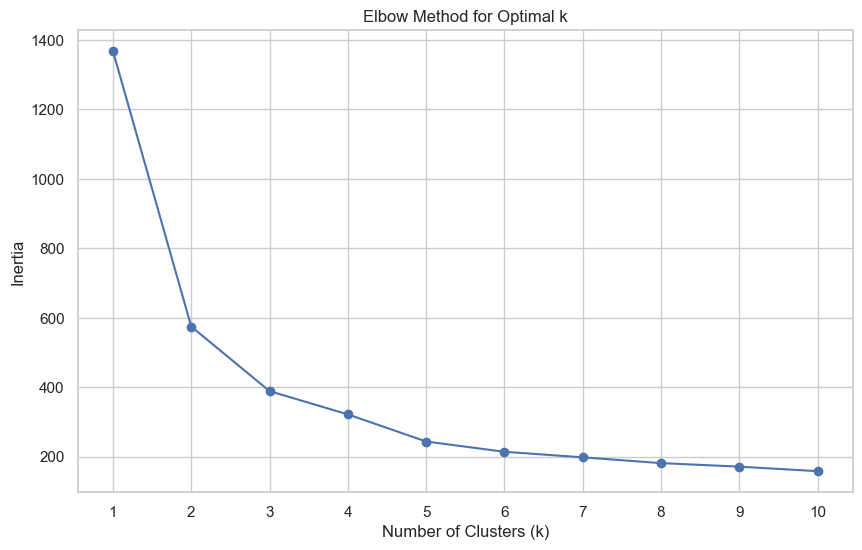

In [12]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np.nan_to_num(X_scaled))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

### Selection of k
*Based on the Elbow plot above, we look for the "elbow" point where the rate of decrease in inertia slows down significantly. Given we know there are 3 species, we expect k=3 to be a good candidate, but the plot will confirm this.*

### Apply K-Means
We will apply K-Means with the selected k (assuming k=3 for now).

In [13]:
# Apply K-Means with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
# KMeans does not accept NaNs. Replace NaNs (e.g., with 0) before fitting.
df['cluster'] = kmeans.fit_predict(np.nan_to_num(X_scaled))

# Check the counts in each cluster
print(df['cluster'].value_counts())

cluster
0    132
1    123
2     89
Name: count, dtype: int64


### Evaluate and Interpret Clusters
We will visualize the clusters and analyze their characteristics.

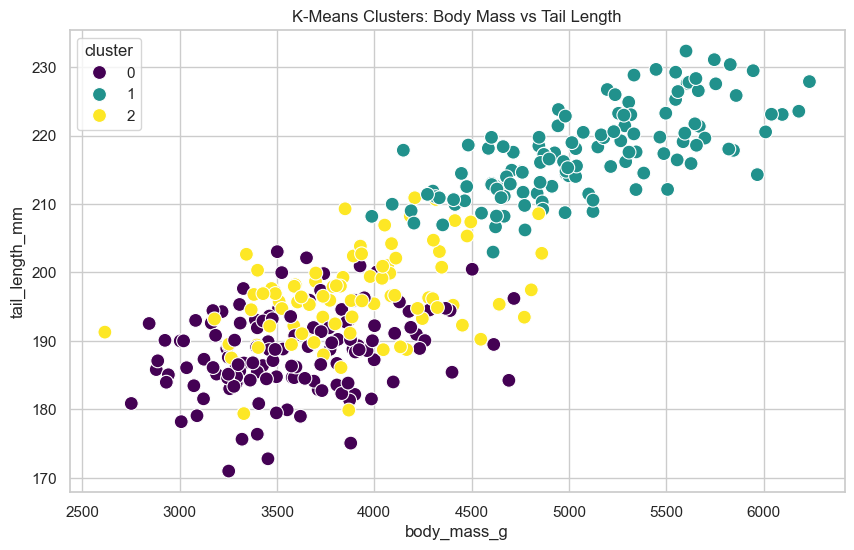

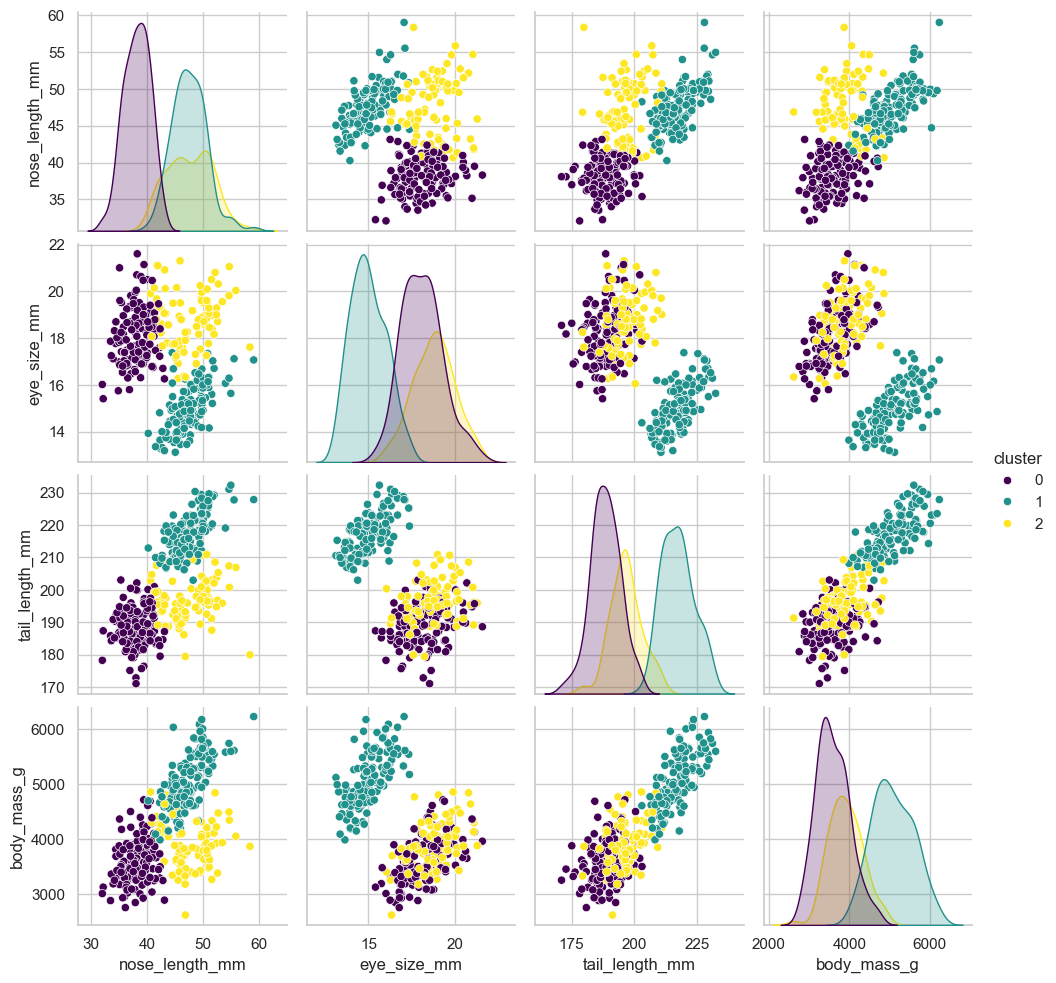

         nose_length_mm  eye_size_mm  tail_length_mm  body_mass_g
cluster                                                          
0             38.209773    18.109621      188.467727  3591.187424
1             47.506016    14.989675      217.262846  5078.801463
2             47.592069    18.783678      196.634483  3904.057586


In [14]:
# Visualize Clusters (Scatter plot of two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='body_mass_g', y='tail_length_mm', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clusters: Body Mass vs Tail Length')
plt.show()

# Visualize Clusters with Pairplot
sns.pairplot(df, vars=features_for_clustering, hue='cluster', palette='viridis')
plt.show()

# Cluster Summary Statistics
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()
print(cluster_summary)

### Cluster Interpretation
*   **Cluster 0:** [Add interpretation based on mean values, e.g., "Smallest haggis with short tails..."]
*   **Cluster 1:** [Add interpretation]
*   **Cluster 2:** [Add interpretation]

### Extra Credit: DBSCAN Clustering
We will now apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to see if it finds different structures, particularly if the clusters are not spherical.

dbscan_cluster
 0    114
 2    106
-1     84
 3     25
 4     12
 1      3
Name: count, dtype: int64


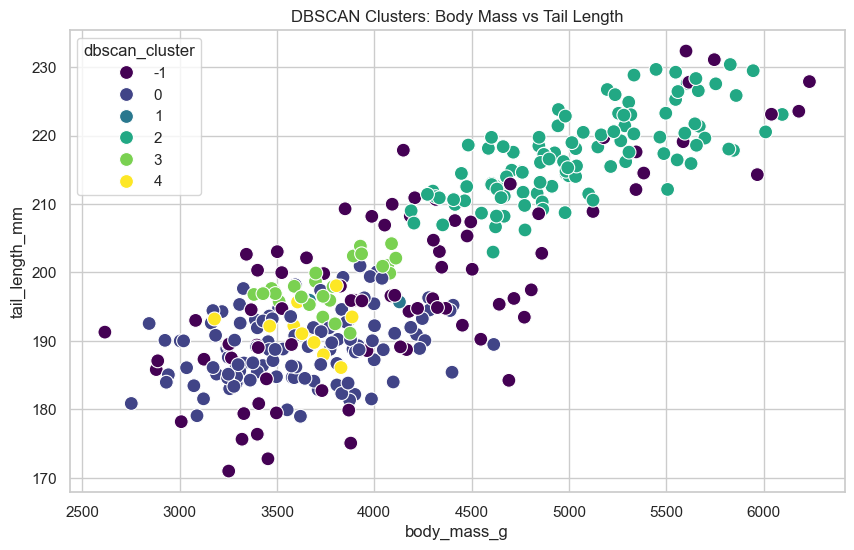

In [15]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5)

# DBSCAN does not handle NaNs. We replace them with 0 (which is the mean after scaling)
df['dbscan_cluster'] = dbscan.fit_predict(np.nan_to_num(X_scaled))

# Check the counts in each cluster (-1 indicates noise)
print(df['dbscan_cluster'].value_counts())

# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='body_mass_g', y='tail_length_mm', hue='dbscan_cluster', palette='viridis', s=100)
plt.title('DBSCAN Clusters: Body Mass vs Tail Length')
plt.show()

### Comparison Commentary
*   **K-Means vs DBSCAN:** [Compare the results. Did DBSCAN find the same clusters? Did it identify noise points (label -1)? K-Means forces every point into a cluster, while DBSCAN can leave outliers as noise. Discuss which seems more appropriate for this dataset.]